In [63]:
# imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

EXPENSES

In [39]:
# reading in data
df = pd.read_excel("currentexpense2324.xlsx")
df.head()

,CO,CDS,District,EDP 365,Current\nExpense ADA,Current\nExpense per ADA,LEA Type
0,1,61119,Alameda Unified,1.550948e+08,8567.86,18101.93,Unified
1,1,61127,Albany City Unified,6.149090e+07,3435.41,17899.14,Unified
2,1,61143,Berkeley Unified,2.205508e+08,8572.17,25728.70,Unified
3,1,61150,Castro Valley Unified,1.424913e+08,8991.52,15847.30,Unified
4,1,61168,Emery Unified,1.586300e+07,554.70,28597.44,Unified


In [40]:
# making conversion dict for County ID values
conversion_df = pd.read_excel('CO-Name.xlsx')
conversion_dict = {}
for i in range(len(conversion_df)):
    conversion_dict[conversion_df['CO'][i]] = conversion_df['County'][i]
conversion_dict

{1: 'Alameda',
 2: 'Alpine',
 3: 'Amador',
 4: 'Butte',
 5: 'Calaveras',
 6: 'Colusa',
 7: 'Contra Costa',
 8: 'Del Norte',
 9: 'El Dorado',
 10: 'Fresno',
 11: 'Glenn',
 12: 'Humboldt',
 13: 'Imperial',
 14: 'Inyo',
 15: 'Kern',
 16: 'Kings',
 17: 'Lake',
 18: 'Lassen',
 19: 'Los Angeles',
 20: 'Madera',
 21: 'Marin',
 22: 'Mariposa',
 23: 'Mendocino',
 24: 'Merced',
 25: 'Modoc',
 26: 'Mono',
 27: 'Monterey',
 28: 'Napa',
 29: 'Nevada',
 30: 'Orange',
 31: 'Placer',
 32: 'Plumas',
 33: 'Riverside',
 34: 'Sacramento',
 35: 'San Benito',
 36: 'San Bernardino',
 37: 'San Diego',
 38: 'San Francisco',
 39: 'San Joaquin',
 40: 'San Luis Obispo',
 41: 'San Mateo',
 42: 'Santa Barbara',
 43: 'Santa Clara',
 44: 'Santa Cruz',
 45: 'Shasta',
 46: 'Sierra',
 47: 'Siskiyou',
 48: 'Solano',
 49: 'Sonoma',
 50: 'Stanislaus',
 51: 'Sutter',
 52: 'Tehama',
 53: 'Trinity',
 54: 'Tulare',
 55: 'Tuolumne',
 56: 'Ventura',
 57: 'Yolo',
 58: 'Yuba'}

In [41]:
# cleaning data
df = df.drop(columns=['CDS', 'District', 'EDP 365', 'Current\nExpense ADA', 'LEA Type'])
df = df.rename(columns={'Current\nExpense per ADA' : 'Expense per ADA'})
df['CO'] = df['CO'].map(conversion_dict)
df.head()

,CO,Expense per ADA
0,Alameda,18101.93
1,Alameda,17899.14
2,Alameda,25728.70
3,Alameda,15847.30
4,Alameda,28597.44


In [42]:
df_aggregated = df.groupby('CO').agg('mean')
df_aggregated.head(10)

,Expense per ADA
CO,
Alameda,22015.700000
Alpine,59610.760000
Amador,15659.380000
Butte,22534.752308
Calaveras,19967.307500
Colusa,16637.125000
Contra Costa,17936.416111
Del Norte,21262.530000
El Dorado,20485.760667


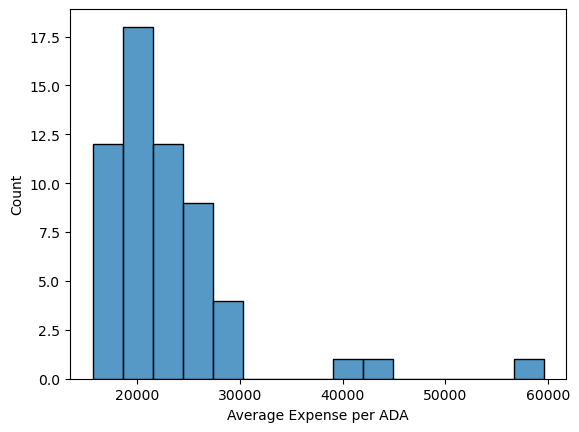

In [43]:
sns.histplot(data=df_aggregated, x='Expense per ADA');
plt.xlabel('Average Expense per ADA');

TEST SCORES

In [45]:
testing_data = pd.read_csv('sb_ca2024_all_csv_v1.txt', delimiter='^', encoding='latin1')
county_info = pd.read_csv('sb_ca2024entities_csv.txt', delimiter='^', encoding='latin1')

In [152]:
# cleaning 
testing_data_short = testing_data[['County Code', 'Mean Scale Score']].replace('*', np.nan).dropna(subset=['Mean Scale Score'])
testing_data_short['Mean Scale Score'] = testing_data_short['Mean Scale Score'].astype(float)
testing_data_short = testing_data_short.groupby('County Code').agg('mean')
testing_data_short.head()

,Mean Scale Score
County Code,
0,2491.557809
1,2495.838243
3,2462.735317
4,2475.203283
5,2456.617852


In [153]:
new_row = pd.DataFrame([[0]], columns=testing_data_short.columns, index=[2])
testing_data_short = pd.concat([testing_data_short, new_row])
testing_data_short = testing_data_short.sort_index()
testing_data_short.head()

,Mean Scale Score
0,2491.557809
1,2495.838243
2,0.000000
3,2462.735317
4,2475.203283


In [154]:
# cleaning county info
county_info_short = county_info[['County Code', 'County Name']].groupby('County Code').agg('first')
county_info_short.head()

,County Name
County Code,
0,State Of California
1,Alameda
2,Alpine
3,Amador
4,Butte


In [155]:
print(len(testing_data_short) == len(county_info_short))
all(testing_data_short.index == county_info_short.index)

True


True

In [156]:
combined_testing_data = county_info_short.merge(testing_data_short, left_index=True, right_index=True)
combined_testing_data.head()

,County Name,Mean Scale Score
County Code,,
0,State Of California,2491.557809
1,Alameda,2495.838243
2,Alpine,0.000000
3,Amador,2462.735317
4,Butte,2475.203283


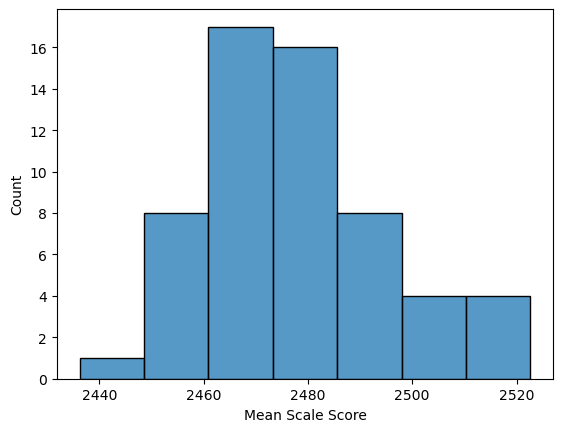

In [158]:
sns.histplot(data=combined_testing_data.drop(index=[2]), x='Mean Scale Score');

Combining test and expense dfs

In [159]:
df_aggregated.head()

,Expense per ADA
CO,
Alameda,22015.700000
Alpine,59610.760000
Amador,15659.380000
Butte,22534.752308
Calaveras,19967.307500


In [160]:
combined_testing_data.head()

,County Name,Mean Scale Score
County Code,,
0,State Of California,2491.557809
1,Alameda,2495.838243
2,Alpine,0.000000
3,Amador,2462.735317
4,Butte,2475.203283


In [166]:
combined_testing_expense = combined_testing_data.merge(df_aggregated, left_on='County Name', right_index=True)
combined_testing_expense.head()

,County Name,Mean Scale Score,Expense per ADA
County Code,,,
1,Alameda,2495.838243,22015.700000
2,Alpine,0.000000,59610.760000
3,Amador,2462.735317,15659.380000
4,Butte,2475.203283,22534.752308
5,Calaveras,2456.617852,19967.307500


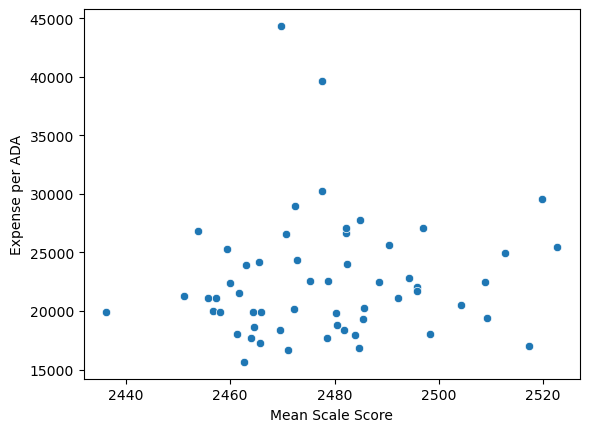

In [168]:
sns.scatterplot(data=combined_testing_expense.drop(index=2), x='Mean Scale Score', y='Expense per ADA');

SAVING CSV

In [169]:
combined_testing_expense.to_csv("final_testing_expense.csv", index=False)